In [7]:
#link to our dataset: https://drive.google.com/open?id=1PK_4NMCWvI-KO7azRknI_wRtlOMKYL4E

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

df = pd.read_csv("listing.csv")

df.head()

,id,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,revenue_per_month
0,44054,https://www.airbnb.com/rooms/44054,Modern 3BD/2BTH (4Beds) Serviced Apt (A39),East Apartments offers comfortable living away...,East Apartments is a western managed serviced ...,East Apartments offers comfortable living away...,none,The neighborhood is a private compound. Just ...,"*For long term reservations (over 90 days), pl...",The easiest method to get around is by taxi or...,...,NaN,NaN,t,f,strict_14_with_grace_period,f,f,11,0.82,669.12
1,100213,https://www.airbnb.com/rooms/100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,none,"5 mins walk to Panglongshan Great Wall, 25 min...","这里地处山区,森林覆盖率高,几乎没有PM2.5的影响｡但早晚温差大,尤其晚间气温较北京市区低...",We arrange taxi service at a very reasonable p...,...,NaN,NaN,t,f,strict_14_with_grace_period,f,f,4,0.14,167.58
2,128496,https://www.airbnb.com/rooms/128496,Heart of Beijing: House with View 2,NaN,"确定一下我家真的适合你们｡非常简单的装修,非现代不豪华｡没有电视有线,因为我们不看国内电视节...","确定一下我家真的适合你们｡非常简单的装修,非现代不豪华｡没有电视有线,因为我们不看国内电视节...",none,NaN,NaN,NaN,...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,2.86,3440.58
3,161902,https://www.airbnb.com/rooms/161902,cozy studio in center of Beijing,NaN,Forget about hotels that charge USD 200 or mor...,Forget about hotels that charge USD 200 or mor...,none,NaN,Important tips I have 6 apartments in one buil...,NaN,...,NaN,NaN,t,f,strict_14_with_grace_period,f,f,5,0.30,116.10
4,162144,https://www.airbnb.com/rooms/162144,"nice studio near subway, sleep 4",NaN,Extended stay self-catering studio apartments ...,Extended stay self-catering studio apartments ...,none,NaN,Important tips I have 6 apartments in one buil...,NaN,...,NaN,NaN,t,f,strict_14_with_grace_period,f,f,5,0.43,238.22


## I. A Glimpse in to the Dataset and Some Plots 
### ************************ skip to section II when training models *******************************

(21705, 89)


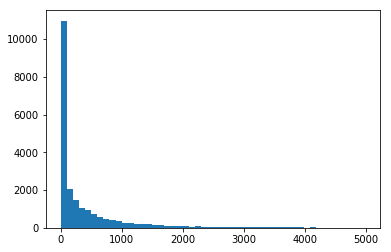

In [59]:
# ********************************skip to section II when training models******************************************

df = df.fillna(method = "bfill")
plt.hist(df[df.revenue_per_month < 5000]["revenue_per_month"],bins=50)
df["revenue_per_month"].value_counts()
print(df.shape)


In [5]:
# neighborhood summary
df["neighbourhood"].value_counts()

Chaoyang                                2794
Sanlitun                                1519
Wangjing                                1151
Shilipu                                 1053
Jinsong/Panjiayuan                       874
Wudaokou                                 801
Shichahai                                734
Shuangjing                               721
Dongzhimen                               665
Chaoyang Park/Tuan Jie Hu                641
Chongwenmen                              498
Dawanglu                                 476
Fengtai                                  461
Zhuang                                   428
Xicheng                                  408
Haidian                                  407
Zuojiazhuang                             380
Shuangyushu                              368
Temple of Heaven                         345
Third Road Jucun/Liucun                  311
ITC                                      299
Dong Si                                  294
Zhongguanc

(array([2221.,    0.,    0., 9578.,    0.,    0., 1853.,    0.,    0.,
           0., 4022.,    0.,    0.,  886.,    0.,    0., 1394.,    0.,
           0.,    0.,  264.,    0.,    0.,  434.,    0.,    0.,   91.,
           0.,    0.,    0.,  215.,    0.,    0.,   29.,    0.,    0.,
         172.,    0.,    0.,    0.,   25.,    0.,    0.,   65.,    0.,
           0.,   54.,    0.,    0.,  402.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ,
         4.3,  4.6,  4.9,  5.2,  5.5,  5.8,  6.1,  6.4,  6.7,  7. ,  7.3,
         7.6,  7.9,  8.2,  8.5,  8.8,  9.1,  9.4,  9.7, 10. , 10.3, 10.6,
        10.9, 11.2, 11.5, 11.8, 12.1, 12.4, 12.7, 13. , 13.3, 13.6, 13.9,
        14.2, 14.5, 14.8, 15.1, 15.4, 15.7, 16. ]),
 <a list of 50 Patch objects>)

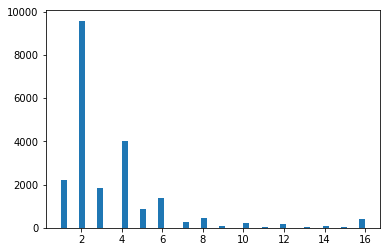

In [6]:
# accomodates summary
plt.hist(df["accommodates"],bins=50)

In [5]:
from mpl_toolkits.mplot3d import Axes3D
def plot_3d():
    fig=plt.figure();
    ax = fig.add_subplot(1,1,1,projection="3d"); ax.set(
    xlabel="$review_scores_rating$",
    ylabel="$accommodates$",
    zlabel="y",
    zlim = (0,1)
    );
    ax.xaxis.pane.fill = False; ax.yaxis.pane.fill = False; ax.zaxis.pane.fill = False; return ax


In [6]:
# df['room_type'] = df['room_type'].map({'Shared room': 1, 'Private room': 2, "Entire home/apt":3})
# df.room_type[df.room_type == 'Shared room'] = 1 
# df.room_type[df.room_type == 'Private room'] = 2
# df.room_type[df.room_type == "Entire home/apt"] = 3
df['room_type'] = df['room_type'].apply({'Shared room': 1, 'Private room': 2, "Entire home/apt":3}.get)

(15, 160) (15, 160)
(21705, 3)
(21705,)


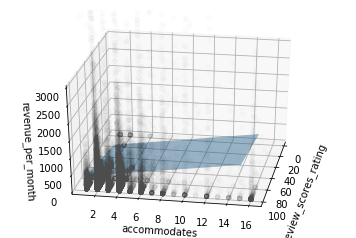

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.linalg

x = df['review_scores_rating']
x = np.nan_to_num(x)
y = df['accommodates']
y = np.nan_to_num(y)
z = df["revenue_per_month"] 
z = np.nan_to_num(z)

X,Y = np.meshgrid(np.arange(min(df['review_scores_rating'].tolist()), max(df['review_scores_rating'].tolist()),0.5),np.arange(min(df['accommodates'].tolist()), max(df['accommodates'].tolist()),1))
XX = X.flatten()
YY = Y.flatten()
X = np.nan_to_num(X)
Y = np.nan_to_num(Y)
print(X.shape, Y.shape)

order = 1    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[x, y, np.ones(z.shape)]
    print(A.shape)
    print(z.shape)
    C,_,_,_ = scipy.linalg.lstsq(A, z)    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

# elif order == 2:
#     # best-fit quadratic curve
#     A = np.c_[np.ones(x.shape), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
#     C,_,_,_ = scipy.linalg.lstsq(A, z)
    
#     # evaluate it on a grid
#     Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

    
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5)
ax.scatter(x, y, z, alpha = 0.01, c = "0.3")
ax.set_xlabel('review_scores_rating')
ax.set_ylabel('accommodates')
ax.set_zlabel('revenue_per_month')
ax.set_zlim3d(0,3000)

ax.view_init(30, 10)

plt.show()


In [8]:
x0, x1, y = , , 
print(len(x0x0),len(x1x1))

SyntaxError: invalid syntax (<ipython-input-8-5cafa850f5f6>, line 1)

(15, 160) (15, 160)
(21705, 3)
(21705,)


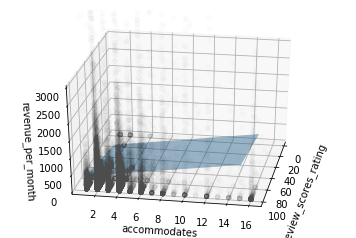

In [9]:
# Some Plotting...

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.linalg

x = df['review_scores_rating']
x = np.nan_to_num(x)
y = df['accommodates']
y = np.nan_to_num(y)
z = df["revenue_per_month"] 
z = np.nan_to_num(z)

X,Y = np.meshgrid(np.arange(min(df['review_scores_rating'].tolist()), max(df['review_scores_rating'].tolist()),0.5),np.arange(min(df['accommodates'].tolist()), max(df['accommodates'].tolist()),1))
XX = X.flatten()
YY = Y.flatten()
X = np.nan_to_num(X)
Y = np.nan_to_num(Y)
print(X.shape, Y.shape)

order = 1    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[x, y, np.ones(z.shape)]
    print(A.shape)
    print(z.shape)
    C,_,_,_ = scipy.linalg.lstsq(A, z)    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

# elif order == 2:
#     # best-fit quadratic curve
#     A = np.c_[np.ones(x.shape), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
#     C,_,_,_ = scipy.linalg.lstsq(A, z)
    
#     # evaluate it on a grid
#     Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

    
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5)
ax.scatter(x, y, z, alpha = 0.01, c = "0.3")
ax.set_xlabel('review_scores_rating')
ax.set_ylabel('accommodates')
ax.set_zlabel('revenue_per_month')
ax.set_zlim3d(0,3000)

ax.view_init(30, 10)

plt.show()


best fit line:
y = 315.29 + 43.16x


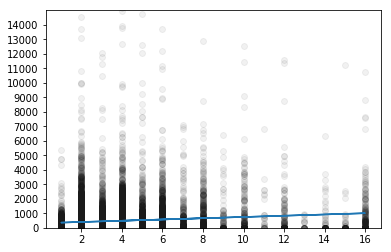

In [10]:
import matplotlib.pyplot as plt

def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(df['accommodates'].tolist(), df['revenue_per_month'].tolist())
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
yfit = [a + b * xi for xi in df['accommodates'].tolist()]
df['revenue_per_month']= df['revenue_per_month'].astype('float64') 
plt.scatter(df['accommodates'].tolist(),df['revenue_per_month'].tolist(), c='0.1', alpha=0.06)
plt.plot(df['accommodates'].tolist(), yfit)
plt.ylim(min(df['revenue_per_month'].tolist()),15000)
plt.yticks(np.arange(min(df['revenue_per_month'].tolist()), 15000,1000))
plt.show()


## II. Data Preprocessing Before Training

In [9]:
df = pd.read_csv("listing.csv")
# Dropping redundant columns
dfCleaned = df.drop(columns=['id', 'listing_url',
 'name',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_about',
 'host_acceptance_rate',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_total_listings_count',
 'host_verifications',
 'street', 
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'amenities',
 'maximum_nights','review_scores_rating',          
 'has_availability',
 'availability_60',
 'availability_90',
 'availability_365',
 'requires_license',
 'license',
 'jurisdiction_names',
 'is_business_travel_ready',
 'calculated_host_listings_count',
 'reviews_per_month',
 'host_location'
])


In [10]:
# fill in N/A values
dfCleaned.fillna(method = "bfill", inplace = True)

In [11]:
#square feet missing too much values, drop column
dfCleaned = dfCleaned.drop(columns=['square_feet'])
#for other entries with missing values, direct drop the rows
dfCleaned.dropna(inplace=True)
#print out the missing values in each columns
dfCleaned.isnull().sum()

experiences_offered                 0
host_since                          0
host_response_time                  0
host_response_rate                  0
host_is_superhost                   0
host_listings_count                 0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood                       0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
availability_30                     0
number_of_reviews                   0
review_scores_accuracy              0
review_scores_cleanliness           0
review_score

In [12]:
#host_since -> host year
dfCleaned['host_year'] = pd.DatetimeIndex(dfCleaned['host_since']).year
dfCleaned = dfCleaned.drop(columns=["host_since"])

In [13]:
#change t/f to 1/0
dummies = pd.get_dummies(dfCleaned["host_is_superhost"], drop_first=True)
dfCleaned["host_is_superhost"] = dummies["t"]
dfCleaned.head()
dummies1 = pd.get_dummies(dfCleaned["host_has_profile_pic"], drop_first=True)
dfCleaned["host_has_profile_pic"] = dummies1["t"]
dummies2 = pd.get_dummies(dfCleaned["host_identity_verified"], drop_first=True)
dfCleaned["host_identity_verified"] = dummies2["t"]
dummies3 = pd.get_dummies(dfCleaned["require_guest_profile_picture"], drop_first=True)
dfCleaned["require_guest_profile_picture"] = dummies3["t"]
dummies4 = pd.get_dummies(dfCleaned["require_guest_phone_verification"], drop_first=True)
dfCleaned["require_guest_phone_verification"] = dummies4["t"]
dummies5 = pd.get_dummies(dfCleaned["instant_bookable"], drop_first=True)
dfCleaned["instant_bookable"] = dummies5["t"]



In [14]:
# experiences_offered = none for all the listings, so remove the coloumn
dfCleaned["experiences_offered"].value_counts()
dfCleaned = dfCleaned.drop(columns = ["experiences_offered"])

In [15]:
#change categorical data into 1,2,3,4,5,6...
dfCleaned["host_response_time"] = dfCleaned["host_response_time"].astype('category')
print(dict(enumerate(dfCleaned["host_response_time"].cat.categories)))
dfCleaned["host_response_time"] = dfCleaned["host_response_time"].cat.codes

dfCleaned["neighbourhood"] = dfCleaned["neighbourhood"].astype('category')
print(dict(enumerate(dfCleaned["neighbourhood"].cat.categories)))
dfCleaned["neighbourhood"] = dfCleaned["neighbourhood"].cat.codes

dfCleaned["property_type"] = dfCleaned["property_type"].astype('category')
print(dict(enumerate(dfCleaned["property_type"].cat.categories)))
dfCleaned["property_type"] = dfCleaned["property_type"].cat.codes

dfCleaned["room_type"] = dfCleaned["room_type"].astype('category')
print(dict(enumerate(dfCleaned["room_type"].cat.categories)))
dfCleaned["room_type"] = dfCleaned["room_type"].cat.codes

dfCleaned["bed_type"] = dfCleaned["bed_type"].astype('category')
print(dict(enumerate(dfCleaned["bed_type"].cat.categories)))
dfCleaned["bed_type"] = dfCleaned["bed_type"].cat.codes

dfCleaned["cancellation_policy"] = dfCleaned["cancellation_policy"].astype('category')
print(dict(enumerate(dfCleaned["cancellation_policy"].cat.categories)))
dfCleaned["cancellation_policy"] = dfCleaned["cancellation_policy"].cat.codes

{0: 'a few days or more', 1: 'within a day', 2: 'within a few hours', 3: 'within an hour'}
{0: 'Ahn Jung', 1: 'Bei Tai Ping Zhuang', 2: 'Beijing University', 3: 'Beiyuan', 4: 'Caoqiao', 5: 'Chaoyang', 6: 'Chaoyang Park/Tuan Jie Hu', 7: 'Chongwenmen', 8: 'Dahongmen', 9: 'Dawanglu', 10: 'Dong Si', 11: 'Dongcheng', 12: 'Dongzhimen', 13: 'Fang Zhuang', 14: 'Fengtai', 15: 'Foreign Trade', 16: 'Fuxingmennei', 17: 'Great Road', 18: 'Guangqumenwai', 19: 'Haidian', 20: 'Hu Fangqiao', 21: 'Huaxiang', 22: 'ITC', 23: 'Jian Guo Men/Beijing Railway Station', 24: 'Jinsong/Panjiayuan', 25: 'Jiuxianqiao', 26: 'Jiàn Wài Dàjiē', 27: 'Kaiyangli', 28: 'Liang Ma Qiao/Sanyuanqiao', 29: 'Liuliqiao/Lize Bridge', 30: 'Niujie', 31: 'Peace', 32: 'Qianmen', 33: 'Qinghe', 34: 'Qingta', 35: 'Sanlitun', 36: 'Shazikou', 37: 'Shichahai', 38: 'Shilipu', 39: 'Shuangjing', 40: 'Shuangyushu', 41: 'Summer Palace', 42: 'Suzhouqiao', 43: 'Temple of Heaven', 44: 'Third Road Jucun/Liucun', 45: 'Wai Avenue', 46: 'Wangfujing/Dong

In [16]:
#change the object data type (%xxx, $xxxx into float)
dfCleaned['price']= dfCleaned.price.str.replace(',', '').astype(float)
dfCleaned['security_deposit'] = dfCleaned.security_deposit.str.replace('$', '')
dfCleaned['security_deposit'] = dfCleaned.security_deposit.str.replace(',', '').astype(float)
dfCleaned['cleaning_fee'] = dfCleaned.cleaning_fee.str.replace('$', '')
dfCleaned['cleaning_fee'] = dfCleaned.cleaning_fee.str.replace(',', '').astype(float)
dfCleaned['extra_people'] = dfCleaned.extra_people.str.replace('$', '')
dfCleaned['extra_people'] = dfCleaned.extra_people.str.replace(',', '').astype(float)
dfCleaned["host_response_rate"]= dfCleaned.host_response_rate.str.replace('%', '').astype(float)

In [17]:
#Generate revenue dummy for step 1 prediction:
revenue_dummy = []
for item in dfCleaned["revenue_per_month"]:
    if item <= 20:
        revenue_dummy.append(0)
    else:
        revenue_dummy.append(1)

dfCleaned["revenue_dummy"] = revenue_dummy        

host_response_time                     int8
host_response_rate                  float64
host_is_superhost                     uint8
host_listings_count                 float64
host_has_profile_pic                  uint8
host_identity_verified                uint8
neighbourhood                          int8
property_type                          int8
room_type                              int8
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                               int8
price                               float64
security_deposit                    float64
cleaning_fee                        float64
guests_included                       int64
extra_people                        float64
minimum_nights                        int64
availability_30                       int64
number_of_reviews                     int64
review_scores_accuracy          

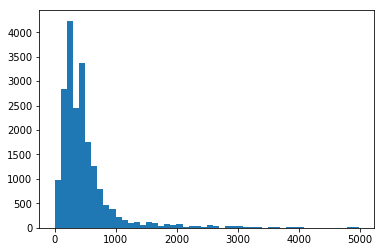

In [18]:
#Remove ourliers in revenue_per_month & Price based on observations on histograms
dfCleaned = dfCleaned[dfCleaned.revenue_per_month < 5000]
dfCleaned = dfCleaned[dfCleaned.price < 5000]
dfCleaned = dfCleaned[dfCleaned.minimum_nights < 15]
dfCleaned = dfCleaned[dfCleaned.security_deposit < 5000]
dfCleaned = dfCleaned[dfCleaned.extra_people < 500]
dfCleaned = dfCleaned[dfCleaned.cleaning_fee < 500]
dfCleaned = dfCleaned[dfCleaned.bathrooms < 10]
dfCleaned = dfCleaned[dfCleaned.beds < 20]
dfCleaned = dfCleaned[dfCleaned.guests_included < 10]

plt.hist(dfCleaned["price"],bins=50)
dfCleaned.dtypes

# **********************************************Finish data preprocessing**************************************

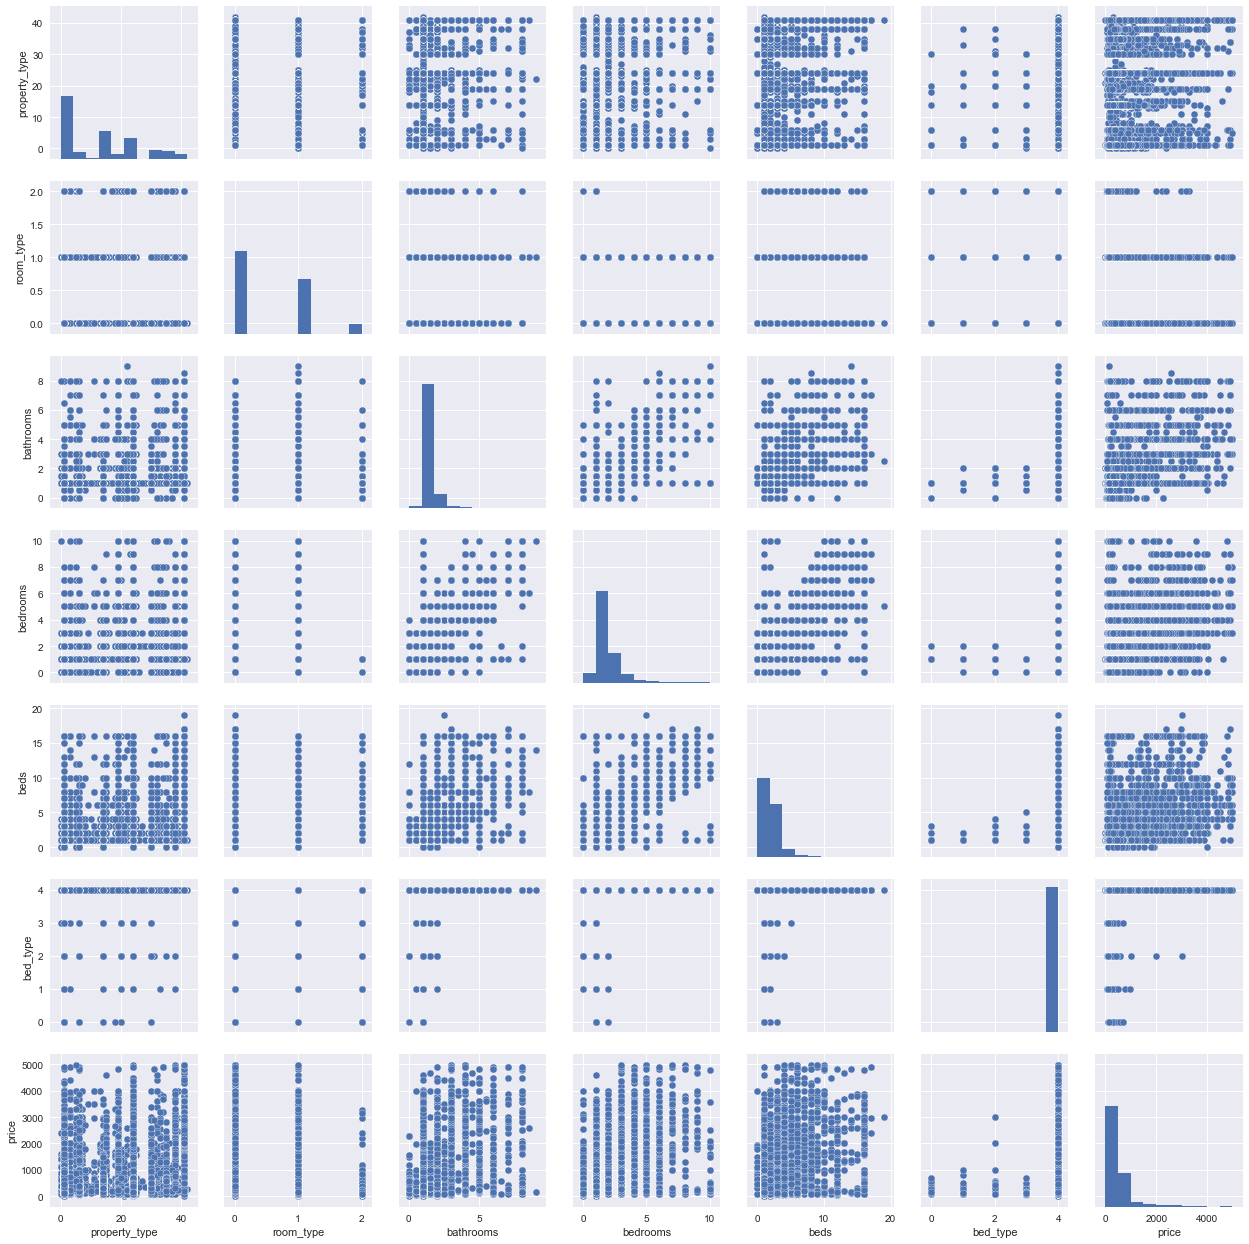

In [21]:
# Data correlation matrix plot
import seaborn as sns
sns.pairplot(dfCleaned[["property_type","room_type","bathrooms", "bedrooms", "beds", "bed_type", "price"]])

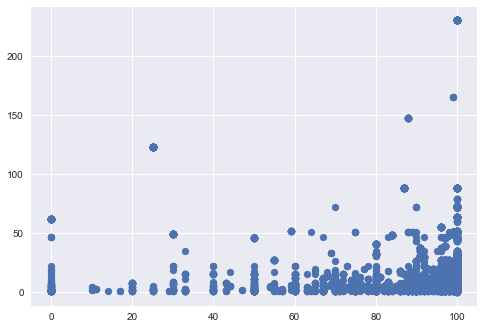

In [22]:
# scatter plot between "host_respons_rate" and "host_listings_count": no obvious correlation
plt.scatter(dfCleaned['host_response_rate'], dfCleaned['host_listings_count'])

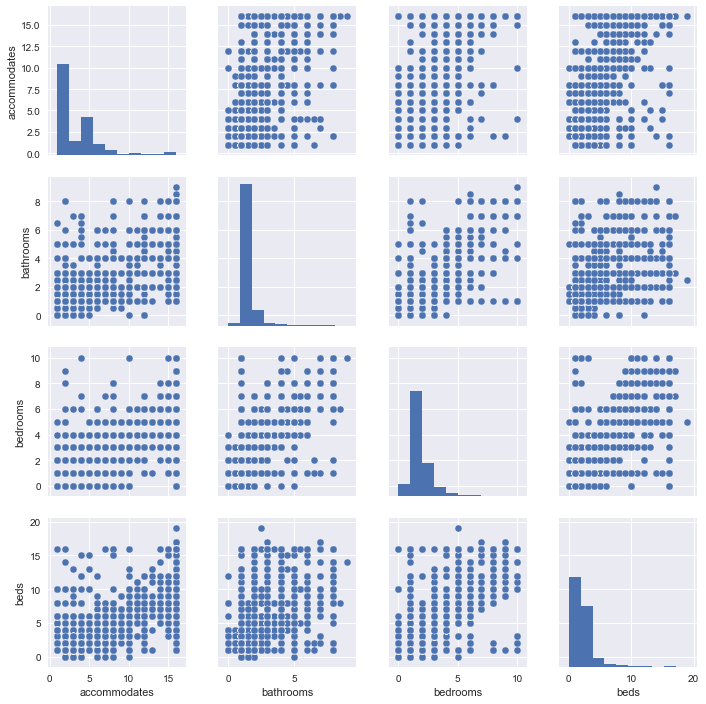

In [23]:
# pairplot of four variables: "bathrooms & bedrooms", "bedrooms & beds" seem to slightly
# correlated, but not significant

sns.pairplot(dfCleaned[['accommodates', 'bathrooms', 'bedrooms', 'beds']])

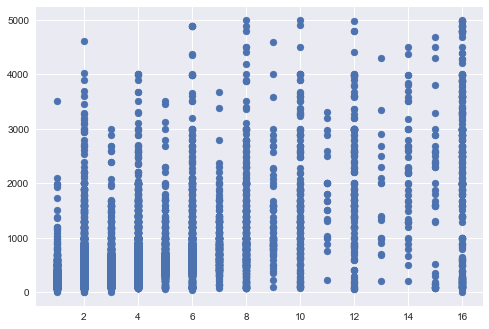

In [30]:
# scatter plot between "accommodates" and "price": no significant collinearity

plt.scatter(dfCleaned['accommodates'], dfCleaned['price'])

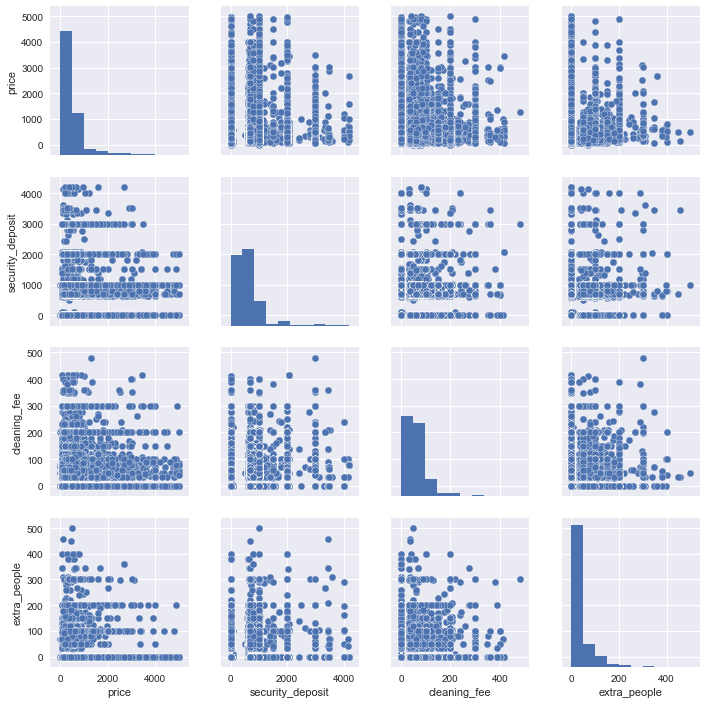

In [24]:
# pairplot among four variables: no significant correlation
sns.pairplot(dfCleaned[['price', 'security_deposit', 'cleaning_fee', 'extra_people']])

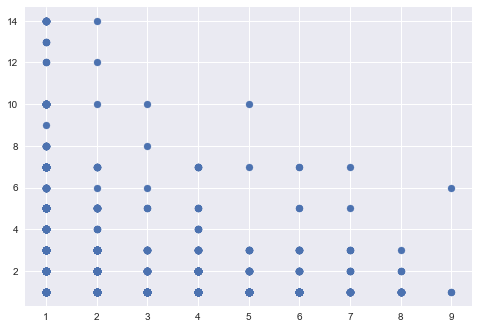

In [25]:
# scatter plot between "guests_included" and "minimum_nights": no significant collinearity

plt.scatter(dfCleaned['guests_included'], dfCleaned['minimum_nights'])

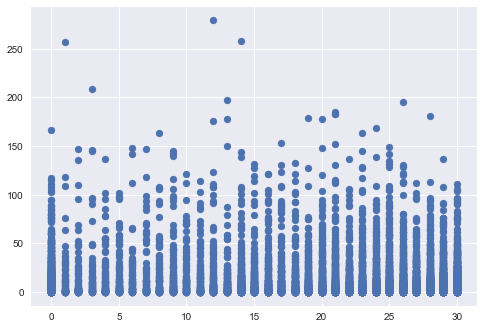

In [26]:
# scatter plot between "availability_30" and "number_of_reviews": no significant collinearity

plt.scatter(dfCleaned['availability_30'], dfCleaned['number_of_reviews'])

## III. Start Training the model

### Step 1: Classification: Whether revenue == 0?

In [20]:
# Split x and y
y_dummy = dfCleaned["revenue_dummy"]
y = dfCleaned["revenue_per_month"]
x = dfCleaned.drop(columns=["revenue_per_month", "revenue_dummy"])
print(x.shape)
print(y.shape)
print(dfCleaned.shape)

(20177, 33)
(20177,)
(20177, 35)


In [21]:
#split training & test for classification
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train_dummy, x_test_dummy, y_train_dummy, y_test_dummy = train_test_split(x, y_dummy, test_size=0.33, random_state=40)
x_train_dummy = x_train_dummy.drop(columns = ["number_of_reviews"])
x_test_dummy = x_test_dummy.drop(columns = ["number_of_reviews"])
# cut = 14000
# x_train,y_train = x[:cut],y[:cut]
# x_test,y_test   = x[cut:],y[cut:]
# print(x_train.shape, y_test.shape)
# print(y_train.shape, y_test.shape)
print(x_train_dummy.shape, x_test_dummy.shape)
print(y_train_dummy.shape, y_test_dummy.shape)


(13518, 32) (6659, 32)
(13518,) (6659,)


#### Constant Models

In [23]:
y_hatdummy0_train = np.full((13518,), 0)
y_hatdummy0_test = np.full((6659,), 0)
train_match = 0



for i in range(13518):
    if y_hatdummy0_train[i] == y_train_dummy.values[i]:
        train_match += 1
train_acc = train_match / 13518

test_match = 0
for i in range(6659):
    if y_hatdummy0_test[i] == y_test_dummy.values[i]:
        test_match += 1
test_acc = test_match / 6659


print("Constant Model: C = 0")
print(" - Training score:")
print("  ", train_acc)
print(" - Testing score:")
print("  ", test_acc)

y_hatdummy1_train = np.full((13518,), 1)
y_hatdummy1_test = np.full((6659,), 1)


train_match1 = 0
for i in range(13518):
    if y_hatdummy1_train[i] == y_train_dummy.values[i]:
        train_match1 += 1
train_acc1 = train_match1 / 13518

test_match1 = 0
for i in range(6659):
    if y_hatdummy1_test[i] == y_test_dummy.values[i]:
        test_match1 += 1
test_acc1 = test_match1 / 6659

print("Constant Model: C = 1")
print(" - Training score:")
print("  ", train_acc1)
print(" - Testing score:")
print("  ", test_acc1)


#Random Guess Model:
import random

train_matchr = 0
for i in range(13518):
    if random.randint(0, 1) == y_train_dummy.values[i]:
        train_matchr += 1
train_accr = train_matchr / 13518

test_matchr = 0
for i in range(6659):
    if random.randint(0, 1) == y_test_dummy.values[i]:
        test_matchr += 1
test_accr = test_matchr / 6659

print("Constant Model: C = mean")
print(" - Training score:")
print("  ", train_accr)
print(" - Testing score:")
print("  ", test_accr)


Constant Model:
 - Training score:
   0.39850569610889186
 - Testing score:
   0.3916503979576513
Constant Model:
 - Training score:
   0.6014943038911081
 - Testing score:
   0.6083496020423487
Constant Model:
 - Training score:
   0.4926024559846131
 - Testing score:
   0.5198978825649497


#### Logistic Regression Model

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

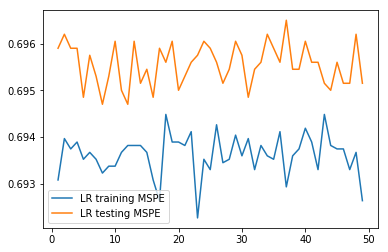

In [24]:
from sklearn.linear_model import LogisticRegression
from matplotlib import cm
train_history_LR = []
test_history_LR = []
for n in range(1,50):
    model_lr = LogisticRegression(penalty = "l2", C = n);
    model_lr.fit(x_train_dummy,y_train_dummy);
    x_train_dummy_predict = model_lr.predict(x_train_dummy)
    x_test_dummy_predict = model_lr.predict(x_test_dummy)
    train_history_LR.append(model_lr.score(x_train_dummy, y_train_dummy))
    test_history_LR.append(model_lr.score(x_test_dummy, y_test_dummy))
    
plt.plot(range(1,50), train_history_LR,label='LR training MSPE')
plt.plot(range(1,50), test_history_LR,label='LR testing MSPE')

plt.legend()



In [67]:
model_lr = LogisticRegression();
model_lr.fit(x_train_dummy,y_train_dummy);
x_train_dummy_predict = model_lr.predict(x_train_dummy)
x_test_dummy_predict = model_lr.predict(x_test_dummy)

scores_lrtrain_cv = cross_val_score(model_lr, x_train_dummy, y_train_dummy, cv=10)
scores_lrtest_cv = cross_val_score(model_lr, x_test_dummy, y_test_dummy, cv=10)

print(" - Training score:")
print("  ",scores_lrtrain_cv.mean())
print(" - Testing score:")
print("  ", scores_lrtest_cv.mean())


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

 - Training score:
   0.6912233748439262
 - Testing score:
   0.6919996717755733


#### Naive Bayes Model

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
model_nb = GaussianNB(priors=None);
model_nb.fit(x_train_dummy,y_train_dummy);
x_train_dummy_nbpredict = model_nb.predict(x_train_dummy)
x_test_dummy_nbpredict = model_nb.predict(x_test_dummy)
score_nbtrain = model_nb.score(x_train_dummy, y_train_dummy)
score_nbtest = model_nb.score(x_test_dummy, y_test_dummy)
print("Naive Bayes:")
print(" - Training score:")
print("  ", score_nbtrain)
print(" - Testing score:")
print("  ", score_nbtest)

scores_nbtrain_cv = cross_val_score(model_nb, x_train_dummy, y_train_dummy, cv=10)
scores_nbtest_cv = cross_val_score(model_nb, x_test_dummy, y_test_dummy, cv=10)
print("Naive Bayes CV:")
print(" - Training score:")
print("  ",scores_nbtrain_cv.mean())
print(" - Testing score:")
print("  ", scores_nbtest_cv.mean())


Naive Bayes:
 - Training score:
   0.6666666666666666
 - Testing score:
   0.6651148821144316
Naive Bayes CV:
 - Training score:
   0.6650383529343664
 - Testing score:
   0.662564597603657


#### Neural Network

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 14,657
Trainable params: 14,657
Non-trainable params: 0
_________________________________________________________________
[0.5985352862761348, 0.601494303873471, 0.6014943039087453, 0.6014943038822896, 0.6014943039087453, 0.6014943039175639, 0.6014943038911081

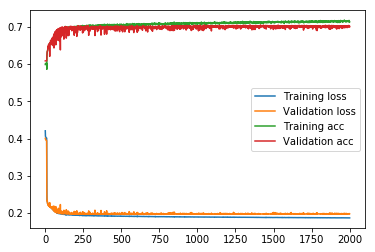

In [25]:


from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape = (x_train_dummy.shape[1],)))
model.add(layers.Dense(64,kernel_regularizer = regularizers.l2(0.001),activation = 'relu'))
model.add(layers.Dense(64,kernel_regularizer = regularizers.l2(0.001),activation = 'relu'))
model.add(layers.Dense(64,kernel_regularizer = regularizers.l2(0.001),activation = 'relu'))



# kernel_regularizer = regularizers.l2(0.001)

model.add(layers.Dense(1,activation = 'sigmoid'))
model.compile(optimizer = "adagrad", loss='mse', metrics = ['acc'])
history = model.fit(x_train_dummy, y_train_dummy, epochs = 2000, verbose = 0, validation_data = (x_test_dummy,y_test_dummy))
model.summary()
# definitely overfit without regularization
# Use Keras history object to check performance
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs,loss, label = "Training loss")
plt.plot(epochs,val_loss, label = "Validation loss")
plt.legend()

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs,acc, label = "Training acc")
plt.plot(epochs,val_acc, label = "Validation acc")
plt.legend()

print(acc)
print(val_acc)




In [66]:
print(" - Training score:")
print("  ", acc[-1])
print(" - Testing score:")
print("  ",val_acc[-1])


 - Training score:
   0.7131232430744778
 - Testing score:
   0.69995494819937


#### Essembles: Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
model_RF= RandomForestClassifier(random_state=1,max_depth = 7)
model_RF.fit(x_train_dummy, y_train_dummy)
print(" - Training score:")
print("  ",model_RF.score(x_train_dummy,y_train_dummy))
print(" - Testing score:")
print("  ",model_RF.score(x_test_dummy,y_test_dummy))

scores_RFtrain_cv = cross_val_score(model_RF, x_train_dummy, y_train_dummy, cv=10)
scores_RFtest_cv = cross_val_score(model_RF, x_test_dummy, y_test_dummy, cv=10)
print(" - Training score:")
print("  ",scores_RFtrain_cv.mean())
print(" - Testing score:")
print("  ", scores_RFtest_cv.mean())



/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 - Training score:
   0.725699067909454
 - Testing score:
   0.7029584021624868
 - Training score:
   0.7035061360625914
 - Testing score:
   0.7029635801891778


#### Essembles:  AdaBoost (selected)

In [69]:
from sklearn.ensemble import AdaBoostClassifier
model_ADB = AdaBoostClassifier(random_state=1)
model_ADB.fit(x_train_dummy,y_train_dummy)
print(" - Training score:")
print("  ",model_ADB.score(x_train_dummy,y_train_dummy))
print(" - Testing score:")
print("  ",model_ADB.score(x_test_dummy,y_test_dummy))

scores_ADBtrain_cv = cross_val_score(model_ADB, x_train_dummy, y_train_dummy, cv=10)
scores_ADBtest_cv = cross_val_score(model_ADB, x_test_dummy, y_test_dummy, cv=10)
print(" - Training score:")
print("  ",scores_ADBtrain_cv.mean())
print(" - Testing score:")
print("  ", scores_ADBtest_cv.mean())

 - Training score:
   0.7153425062879124
 - Testing score:
   0.7076137558191921
 - Training score:
   0.7083140468765632
 - Testing score:
   0.7034106444711669


#### Essembles:  XGBoost

In [29]:
import xgboost as xgb
model_XGB = xgb.XGBClassifier(random_state=1, learning_rate = 0.01,max_depth = 9)
model_XGB.fit(x_train_dummy,y_train_dummy)
print(" - Training score:")
print(model_XGB.score(x_train_dummy,y_train_dummy))
print(" - Testing score:")
print(model_XGB.score(x_test_dummy,y_test_dummy))

 - Training score:
0.7836958129900873
 - Testing score:
0.714071181859138


## Step 2: Revenue if not 0, then how much?

In [33]:
# filter out listings with revenue == 0 
dfCleaned_rev_dummy_1 = dfCleaned[dfCleaned.revenue_dummy == 1]
print(dfCleaned_rev_dummy_1.shape)

y_rev_dummy_1 = dfCleaned_rev_dummy_1["revenue_per_month"]
x_rev_dummy_1 = dfCleaned_rev_dummy_1.drop(columns=["revenue_per_month", "revenue_dummy"])

print(y_rev_dummy_1.shape,x_rev_dummy_1.shape)

(12182, 35)
(12182,) (12182, 33)


In [34]:
#splitting test and training set
x_train, x_test, y_train, y_test = train_test_split(x_rev_dummy_1, y_rev_dummy_1, test_size=0.33, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(8161, 33) (4021, 33)
(8161,) (4021,)


In [48]:
# ***create custom "Mean Squared Percentage Error"(MSPE) scoring metric
from sklearn.metrics import make_scorer
def my_custom_loss_functree(y_true, y_pred):
    #####IMPORTANT: RESHAPE THE PARAMETERS PASSED IN FIRST TO GUARANTEE THAT NO WEIRD THINGS HAPPEN!!!
    y_true = y_true.reshape(y_true.shape[0], 1)
    y_pred = y_pred.reshape(y_pred.shape[0], 1)
    my_sum = np.sum(np.power((y_true - y_pred)/y_true, 2))
    return my_sum/y_pred.shape[0]

def my_custom_loss_func(y_true, y_pred):
    my_sum = np.sum(np.power((y_true - y_pred)/y_true, 2))
    return my_sum/y_pred.shape[0]




#### Constant model (using average of target variable)

In [38]:
from sklearn.metrics import mean_squared_error

np.average(y_train)
y_hat0_train = np.full((8161,), np.average(y_train))
y_hat0_test = np.full((4021,), np.average(y_train))

print("Constant Model: MSE train", mean_squared_error(y_train, y_hat0_train) , "MSE test" , mean_squared_error(y_test, y_hat0_test))
print("MSPE train:",my_custom_loss_func(y_train, y_hat0_train))
print("MSPE test:",my_custom_loss_func(y_test, y_hat0_test) )


Constant Model: MSE train 564482.7734177434 MSE test 598364.8569125487
MSPE train: 31.94394644879556
MSPE test: 32.763694710975294


#### Linear Regression Model

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# linear regression:
model1 = Lasso()
model1.fit(x_train, y_train)
y_hat1_train = model1.predict(x_train)
y_hat1_test = model1.predict(x_test)
print("Linear Regression: MSE train", mean_squared_error(y_train, y_hat1_train) , "MSE test" , mean_squared_error(y_test, y_hat1_test))
print("Linear Regression:")
print("MSPE train:", my_custom_loss_func(y_train, y_hat1_train))
print("MSPE test:" , my_custom_loss_func(y_test, y_hat1_test))


# for idx, col_name in enumerate(list(x_train.columns)):
#     print("The coefficient for {} is {}".format(col_name,model1.coef_[idx]))




Linear Regression: MSE train 329490.4010623137 MSE test 339958.66836479725
Linear Regression:
MSPE train: 8.489451694121968
MSPE test: 9.379470778416836


#### Polynomial Regression (order = 2) with Ridge and Lasso Regularization



In [40]:

poly = PolynomialFeatures(2)
xpoly_train = poly.fit_transform(x_train)
print(xpoly_train.shape)
poly2 = PolynomialFeatures(2)
xpoly_test = poly2.fit_transform(x_test)
print(xpoly_test.shape)

trainMSPE_history_Ridge = []
testMSPE_history_Ridge = []
for n in range(1,200):
    model2 = Ridge(alpha=n)
    model2.fit(xpoly_train, y_train)
    y_hat2_train = model2.predict(xpoly_train)
    y_hat2_test = model2.predict(xpoly_test)
    trainMSPE_history_Ridge.append (my_custom_loss_func(y_train, y_hat2_train))
    testMSPE_history_Ridge.append(my_custom_loss_func(y_test, y_hat2_test))



# print("Polynomia Linear Regression: MSE train", mean_squared_error(y_train, y_hat2_train) , "MSE test" , mean_squared_error(y_test, y_hat2_test))
# print("Polynomia Linear Regression:")
# print("MSPE train:", my_custom_loss_func(y_train, y_hat2_train))
# print("MSPE test" , my_custom_loss_func(y_test, y_hat2_test))




(8161, 595)
(4021, 595)


/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.386914e-17
  overwrite_a=True).T
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.839897e-17
  overwrite_a=True).T
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.095054e-17
  overwrite_a=True).T
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.847541e-1

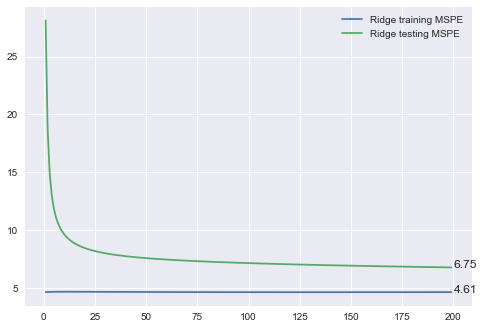

In [41]:
plt.plot(range(1,200), trainMSPE_history_Ridge,label='Ridge training MSPE')
plt.plot(range(1,200), testMSPE_history_Ridge,label='Ridge testing MSPE')
plt.annotate(xy=[200,testMSPE_history_Ridge[-1]], s=6.75)
plt.annotate(xy=[200,trainMSPE_history_Ridge[-1]], s=4.61)
plt.legend()

In [42]:
trainMSPE_history_Lasso = []
testMSPE_history_Lasso = []
for n in range(1,50):
    model2 = Lasso(alpha=n)
    model2.fit(xpoly_train, y_train)
    y_hat2_train = model2.predict(xpoly_train)
    y_hat2_test = model2.predict(xpoly_test)
    trainMSPE_history_Lasso.append (my_custom_loss_func(y_train, y_hat2_train))
    testMSPE_history_Lasso.append(my_custom_loss_func(y_test, y_hat2_test))
print("DONE")

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

DONE


/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


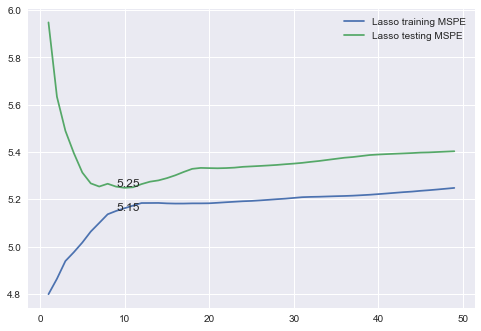

In [45]:
import matplotlib.pyplot as plt

plt.plot(range(1,50), trainMSPE_history_Lasso,label='Lasso training MSPE')
plt.plot(range(1,50), testMSPE_history_Lasso,label='Lasso testing MSPE')
plt.annotate(xy=[9,testMSPE_history_Lasso[-41]], s=5.25)
plt.annotate(xy=[9,trainMSPE_history_Lasso[-41]], s=5.15)
plt.legend()

In [46]:
print("Polynomial LR with Lasso Regularization with alpha == 9")
print("MSPE train:", trainMSPE_history_Lasso[-41])
print("MSPE test:" , testMSPE_history_Lasso[-41])

Polynomial LR with Lasso Regularization with alpha == 9
MSPE train: 5.15129561418086
MSPE test: 5.254098065833225


In [48]:
model2o = Lasso(alpha=9)
model2o.fit(xpoly_train, y_train)
y_hat2o_train = model2o.predict(xpoly_train)
y_hat2o_test = model2o.predict(xpoly_test)
print("MSPE train:", my_custom_loss_func(y_train, y_hat2o_train))
print("MSPE test:" , my_custom_loss_func(y_test, y_hat2o_test))

MSPE train: 5.15129561418086
MSPE test: 5.254098065833225


/Applications/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


#### SGD Regression

In [49]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor 
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import uniform as sp_unif
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import SGDRegressor

pipeline = Pipeline([
('mm', MinMaxScaler()),
('poly', PolynomialFeatures()), 
('sgd',  SGDRegressor(penalty = 'l1'))
])
parameters = {
    'poly__degree':  [1,2],
    'sgd__max_iter': [2,3,4,5,6],
}
random_search = RandomizedSearchCV(pipeline, parameters, 
                                   scoring='neg_mean_squared_error', n_jobs=4, verbose=1,cv=5,return_train_score=True)
random_search.fit(x_train,y_train.ravel()) 
print(random_search.cv_results_) 
print(random_search.best_params_)

model3 = random_search.best_estimator_ 
model3.fit(x_train,y_train)
y_hat3_train = model3.predict(x_train) 
y_hat3_test = model3.predict(x_test) 




print("SGD MSE train:", mean_squared_error(y_train, y_hat3_train) , "MSE test" , mean_squared_error(y_test, y_hat3_test))
print("SGD:")
print("MSPE train:", my_custom_loss_func(y_train, y_hat3_train))
print("MSPE test:" , my_custom_loss_func(y_test, y_hat3_test))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   11.8s finished
/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


{'mean_fit_time': array([0.04774156, 0.03906121, 0.0412199 , 0.04389763, 0.05755901,
       0.44819322, 0.34567289, 0.49915619, 0.41697783, 0.43934536]), 'std_fit_time': array([0.01362751, 0.0058337 , 0.00301148, 0.00230556, 0.0170835 ,
       0.04640046, 0.00693609, 0.08466597, 0.03541215, 0.05188182]), 'mean_score_time': array([0.0107358 , 0.00673804, 0.00631003, 0.00571051, 0.01344261,
       0.06788054, 0.05795288, 0.06915994, 0.04976463, 0.03529687]), 'std_score_time': array([0.00209142, 0.00203479, 0.00100752, 0.00106097, 0.01500945,
       0.01112729, 0.01327322, 0.03181442, 0.01021248, 0.00791795]), 'param_sgd__max_iter': masked_array(data=[2, 3, 4, 5, 6, 2, 3, 4, 5, 6],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_poly__degree': masked_array(data=[1, 1, 1, 1, 1, 2, 2, 2, 2, 2],
             mask=[False, False, False, False, False, False, False, False,
      

/Applications/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


SGD MSE train: 344424.535214715 MSE test 356914.2550345537
SGD:
MSPE train: 4.951280799502177
MSPE test: 5.027923087970779


#### Decision Tree

In [50]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
print(x_train.shape, x_test.shape)   
print(y_train.shape, y_test.shape)

(8161, 33) (4021, 33)
(8161, 1) (4021, 1)


In [51]:
#prepare MSPE error as a scoring metric
custom_MSPE_score = make_scorer(my_custom_loss_func, greater_is_better = False) #this is a "loss" metric("greater_is_better = False")

First, visualize the tree using the entire dataset to get a sense

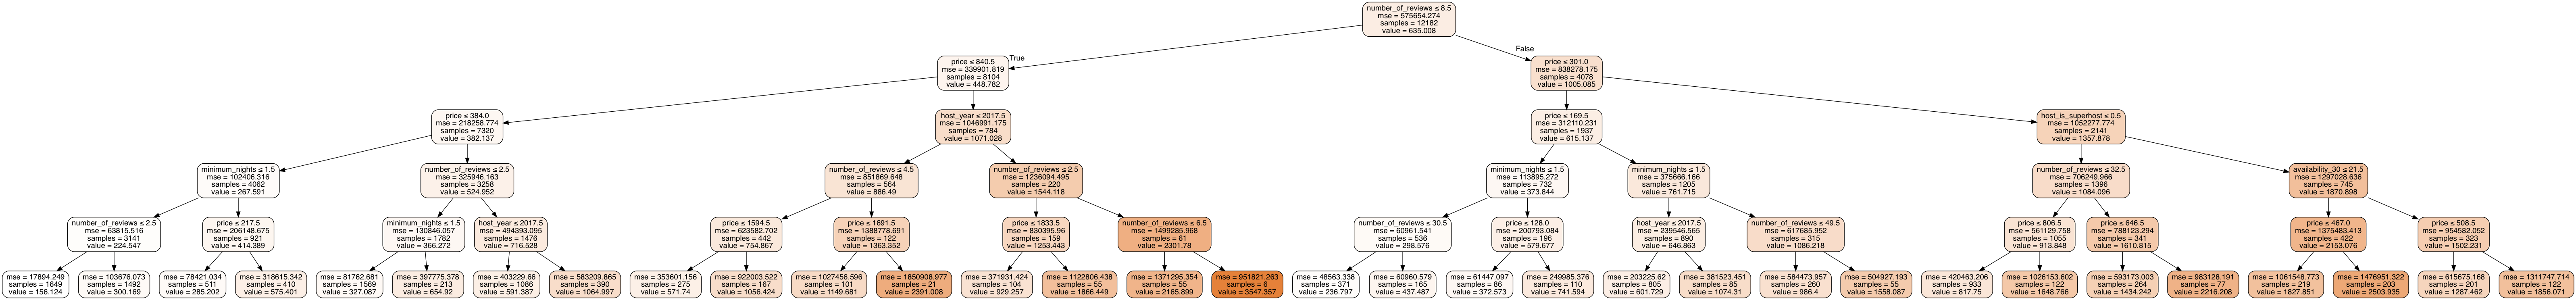

In [52]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 5)
model.fit(x_rev_dummy_1,y_rev_dummy_1)

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded = True,
               special_characters = True, feature_names = list(x_rev_dummy_1.columns))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

First scenario: No hyperparameter specified(using all defaults) -> TREMENDOUSLY OVERFIT!!!

In [53]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test).reshape(y_test.shape[0],1)

print("MSPE train:", my_custom_loss_functree(y_train, regressor.predict(x_train).reshape(y_train.shape[0],1)))
print("MSPE test:", my_custom_loss_functree(y_test, y_pred))

MSPE train: 1.2085191000538846e-05
MSPE test: 7.317999121179118


Try specifying "max_depth" hyperparameter -> improved result

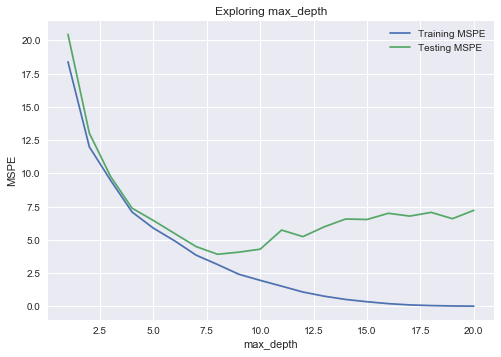

In [54]:
from sklearn.tree import DecisionTreeRegressor
#import sklearn.metrics

trainMSPE_history = []
testMSPE_history = []
for n in range(1,21):
    regressor_1 = DecisionTreeRegressor(max_depth = n)
    regressor_1.fit(x_train, y_train)
    y_pred_1 = regressor_1.predict(x_test).reshape(y_test.shape[0],1)
    this_train_err = my_custom_loss_functree(y_train, regressor_1.predict(x_train).reshape(y_train.shape[0], 1))
    trainMSPE_history.append(this_train_err) 
    this_test_err = my_custom_loss_functree(y_test, y_pred_1)
    testMSPE_history.append(this_test_err)

plt.title('Exploring max_depth')
plt.xlabel("max_depth")
plt.ylabel("MSPE")
plt.plot(range(1,21), trainMSPE_history, label = 'Training MSPE')
plt.plot(range(1,21), testMSPE_history, label = 'Testing MSPE')
plt.legend()

In [55]:
# If choose "max_depth = 7":

from sklearn.tree import DecisionTreeRegressor
regressor_1a = DecisionTreeRegressor(max_depth = 7)
regressor_1a.fit(x_train, y_train)
y_pred_1a = regressor_1a.predict(x_test).reshape(y_test.shape[0],1)

train_predict = regressor_1a.predict(x_train)
#print(train_predict.shape)
#print(y_pred_1a.shape)

print("MSPE train:", my_custom_loss_functree(y_train, regressor_1a.predict(x_train).reshape(y_train.shape[0],1)))
print("MSPE test:", my_custom_loss_functree(y_test, y_pred_1a))

MSPE train: 3.8514701048510465
MSPE test: 4.479988529076299


Try specifying "min_samples_leaf" hyperparameter

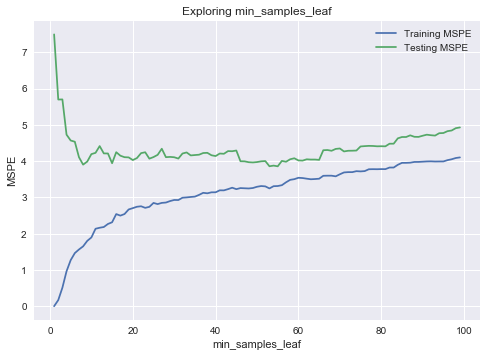

In [56]:
from sklearn.tree import DecisionTreeRegressor
#import sklearn.metrics

trainMSPE_history = []
testMSPE_history = []
for n in range(1, 100):
    regressor_2 = DecisionTreeRegressor(min_samples_leaf = n)
    regressor_2.fit(x_train, y_train)
    y_pred_2 = regressor_2.predict(x_test).reshape(y_test.shape[0],1)
    this_train_err = my_custom_loss_functree(y_train, regressor_2.predict(x_train).reshape(y_train.shape[0],1))
    trainMSPE_history.append(this_train_err) 
    this_test_err = my_custom_loss_functree(y_test, y_pred_2)
    testMSPE_history.append(this_test_err)
    
plt.title('Exploring min_samples_leaf')
plt.xlabel("min_samples_leaf")
plt.ylabel("MSPE")
plt.plot(range(1, 100), trainMSPE_history, label = 'Training MSPE')
plt.plot(range(1, 100), testMSPE_history, label = 'Testing MSPE')
plt.legend()

Try specifying "max_features" hyperparameter -> SUPER OVERFITTING (almost 0 training MSPE for all cases)

due to internal mechanism of sklearn: according to sklearn documentation for decision tree, the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features

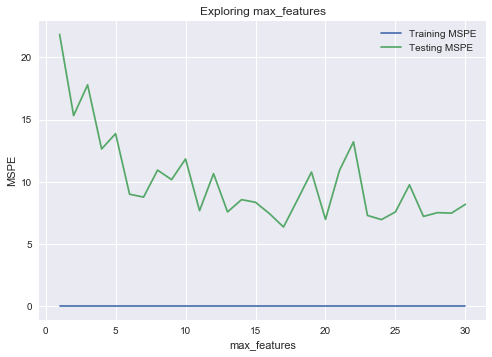

In [57]:
from sklearn.tree import DecisionTreeRegressor
#import sklearn.metrics

trainMSPE_history = []
testMSPE_history = []
for n in range(1, 31):
    regressor_3 = DecisionTreeRegressor(max_features = n)
    regressor_3.fit(x_train, y_train)
    y_pred_3 = regressor_3.predict(x_test).reshape(y_test.shape[0],1)
    this_train_err = my_custom_loss_functree(y_train, regressor_3.predict(x_train).reshape(y_train.shape[0], 1))
    trainMSPE_history.append(this_train_err) 
    this_test_err = my_custom_loss_functree(y_test, y_pred_3)
    testMSPE_history.append(this_test_err)
  
plt.title('Exploring max_features')
plt.xlabel("max_features")
plt.ylabel("MSPE")
plt.plot(range(1, 31), trainMSPE_history, label = 'Training MSPE')
plt.plot(range(1, 31), testMSPE_history, label = 'Testing MSPE')
plt.legend()
#print(y_pred_3)
#print(y_test)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics
custom_MSPE_score = make_scorer(my_custom_loss_func, greater_is_better = False) #this is a "loss" metric("greater_is_better = False")

parameters = {
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [5,10,15,20,25,30,35,40,45,50]
}
model = DecisionTreeRegressor()
grid_search = GridSearchCV(model, param_grid = parameters, scoring = custom_MSPE_score, cv = 10, return_train_score = True)
grid_search.fit(x_train, y_train.ravel())
print(grid_search.cv_results_)
print(grid_search.best_params_)

model_optim = grid_search.best_estimator_
model_optim.fit(x_train, y_train.ravel())
y_pred_optim = model_optim.predict(x_test)

print("MSPE train score:", my_custom_loss_functree(y_train, model_optim.predict(x_train).reshape(y_train.shape[0],1)))
print("MSPE test score:", my_custom_loss_functree(y_test, model_optim.predict(x_test).reshape(y_test.shape[0],1)))

{'mean_fit_time': array([0.01144917, 0.0121083 , 0.01103029, 0.01204283, 0.0108005 ,
       0.01156118, 0.01365812, 0.01277678, 0.01378839, 0.01449938,
       0.01545892, 0.01461928, 0.01417594, 0.01628747, 0.01454368,
       0.01471198, 0.01362882, 0.01397829, 0.0136904 , 0.01407375,
       0.01844311, 0.02019429, 0.01737721, 0.02011075, 0.01881325,
       0.01684525, 0.01697402, 0.01683815, 0.01843719, 0.01678448,
       0.02034671, 0.02079372, 0.02034359, 0.02162006, 0.02182894,
       0.02591908, 0.02097828, 0.02020864, 0.0218684 , 0.02091572,
       0.02483222, 0.02403486, 0.02426407, 0.03021245, 0.02652752,
       0.02454524, 0.02757983, 0.0251215 , 0.0264864 , 0.02768888,
       0.02909691, 0.02891831, 0.02746198, 0.02867773, 0.02725379,
       0.0267632 , 0.02790592, 0.02780161, 0.03072944, 0.02888234,
       0.03168709, 0.03175371, 0.03145382, 0.03099346, 0.03040521,
       0.03102422, 0.03020897, 0.02935889, 0.02919059, 0.02851615,
       0.03714595, 0.03434505, 0.03453212, 0

#### KNN

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics
model4  = KNeighborsRegressor()

from scipy.stats import randint as sp_randint

param_dist = {
    'n_neighbors': sp_randint(1,200),
    'weights': 'distance',
    'algorithm': 'ball_tree'
}
random_search = RandomizedSearchCV(
    model4,
    param_distributions = param_dist,
    n_iter = 10
)

model4.fit(x_train, y_train)
y_hat4_train = model4.predict(x_train)
y_hat4_test = model4.predict(x_test)
print("K-Nearest Neighbor: MSE train", mean_squared_error(y_train, y_hat4_train) , "MSE test" , mean_squared_error(y_test, y_hat4_test))
print("K-Nearest Neighbor: MSPE train", my_custom_loss_func(y_train, y_hat4_train) , "MSPE test" , my_custom_loss_func(y_test, y_hat4_test))



K-Nearest Neighbor: MSE train 305717.0501343502 MSE test 481963.56040871626
K-Nearest Neighbor: MSPE train 11.824421798164016 MSPE test 16.359694931902105


#### Essembles: Bagging

In [50]:

from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
model_bg = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1, max_depth = 8)).fit(x_train, y_train)

y_hatbg_train = model_bg.predict(x_train)
y_hatbg_test = model_bg.predict(x_test)
print("BaggingRegressor: MSE train", mean_squared_error(y_train, y_hatbg_train) , "MSE test" , mean_squared_error(y_test, y_hatbg_test))
print("MSPE train:", my_custom_loss_func(y_train, y_hatbg_train))
print("MSPE test:" , my_custom_loss_func(y_test, y_hatbg_test))


BaggingRegressor: MSE train 166807.5853794344 MSE test 252291.9607388405
MSPE train: 2.936387104483272
MSPE test: 3.7569252527703467


#### Essembles: Random Forest


In [51]:
from sklearn.ensemble import RandomForestRegressor
model_RFR= RandomForestRegressor(max_depth = 10, min_samples_leaf = 10)
model_RFR.fit(x_train, y_train)
y_hatRFR_train = model_RFR.predict(x_train)
y_hatRFR_test = model_RFR.predict(x_test)
print("MSPE train:", my_custom_loss_func(y_train, y_hatRFR_train))
print("MSPE test:" , my_custom_loss_func(y_test, y_hatRFR_test))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSPE train: 2.2267737958579747
MSPE test: 3.268095881489916


In [300]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics

parameters = {
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [5,10,15,20,25,30,35,40,45,50]
}
modelRFR = RandomForestRegressor()
grid_search = GridSearchCV(modelRFR, param_grid = parameters, scoring = custom_MSPE_score, cv = 10, return_train_score = True)
grid_search.fit(x_train, y_train.ravel())
print(grid_search.cv_results_)
print(grid_search.best_params_)

model_optim = grid_search.best_estimator_
model_optim.fit(x_train, y_train.ravel())
y_pred_optim = model_optim.predict(x_test)

print("MSPE train score:", my_custom_loss_func(y_train, model_optim.predict(x_train)))
print("MSPE test score:", my_custom_loss_func(y_test, model_optim.predict(x_test)))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

{'mean_fit_time': array([0.04362199, 0.04326911, 0.04427915, 0.04352837, 0.04386952,
       0.04275689, 0.04248521, 0.043472  , 0.04312971, 0.0443372 ,
       0.06185095, 0.07648077, 0.06260588, 0.06116536, 0.060392  ,
       0.06161911, 0.06211736, 0.06456852, 0.06597011, 0.0661051 ,
       0.09784477, 0.08839834, 0.08339694, 0.08522589, 0.08170161,
       0.07967284, 0.08062694, 0.08050807, 0.08149951, 0.08136177,
       0.09852881, 0.09758408, 0.10128124, 0.10032649, 0.10022938,
       0.09959023, 0.09977241, 0.09870887, 0.10810783, 0.09599099,
       0.13339612, 0.12043219, 0.11910498, 0.12072091, 0.11899469,
       0.11939957, 0.11646702, 0.12572832, 0.11210637, 0.11067424,
       0.13823829, 0.13692138, 0.13630548, 0.13375807, 0.13458757,
       0.1291785 , 0.12945168, 0.12743223, 0.12253423, 0.12743454,
       0.15480986, 0.15457628, 0.14989264, 0.14595106, 0.14445691,
       0.14120002, 0.14347298, 0.14361269, 0.14425013, 0.12867973,
       0.18251231, 0.17249353, 0.16415877, 0

MSPE train score: 2.3465543959061312
MSPE test score: 3.4341842442484145


#### Essembles: XGBoost

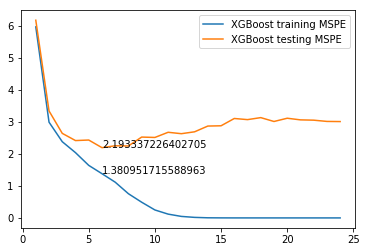

In [297]:
import xgboost as xgb

trainMSPE_historyXGB = []
testMSPE_historyXGB = []
for n in range(1,25):
    model_XGBB = xgb.XGBRegressor(max_depth = n)
    model_XGBB.fit(x_train, y_train)
    y_hatXGBB_train = model_XGBB.predict(x_train)
    y_hatXGBB_test = model_XGBB.predict(x_test)
    trainMSPE_historyXGB.append(my_custom_loss_func(y_train, y_hatXGBB_train))
    testMSPE_historyXGB.append(my_custom_loss_func(y_test, y_hatXGBB_test))
    
plt.plot(range(1,25), trainMSPE_historyXGB,label='XGBoost training MSPE')
plt.plot(range(1,25), testMSPE_historyXGB,label='XGBoost testing MSPE')
plt.annotate(xy=[6,trainMSPE_historyXGB[-19]], s=trainMSPE_historyXGB[-19])
plt.annotate(xy=[6,testMSPE_historyXGB[-19]], s=testMSPE_historyXGB[-19])
plt.legend()

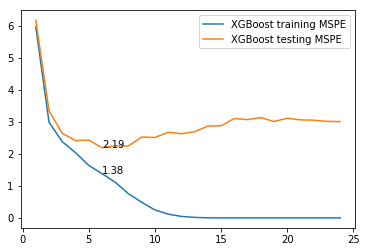

In [316]:
plt.plot(range(1,25), trainMSPE_historyXGB,label='XGBoost training MSPE')
plt.plot(range(1,25), testMSPE_historyXGB,label='XGBoost testing MSPE')
plt.annotate(xy=[6,trainMSPE_historyXGB[-19]], s=1.38)
plt.annotate(xy=[6,testMSPE_historyXGB[-19]], s=2.19)
plt.legend()

In [52]:
# choosing optimal 6
model_XGBB = xgb.XGBRegressor(max_depth = 6)
model_XGBB.fit(x_train, y_train)
y_hatXGBB_train = model_XGBB.predict(x_train)
y_hatXGBB_test = model_XGBB.predict(x_test)
print("XGB training MSPE:", my_custom_loss_func(y_train, y_hatXGBB_train))
print("XGB testing MSPE:",my_custom_loss_func(y_test, y_hatXGBB_test))


XGB training MSPE: 1.380951715588963
XGB testing MSPE: 2.193337226402705


#### Essembles: Stacking (selected)

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression


np.set_printoptions(suppress=True) 
# 不使用科学计数法

regressors = [model_XGBB,model_RFR] 
S_train = np.c_[[model.predict(x_train) for model in regressors]].T 
S_test = np.c_[[model.predict(x_test) for model in regressors]].T 
# # meta_model = SGDRegressor(alpha=1,random_state=456,penalty = 'l1') 
# meta_model_MSPE_test = []
# meta_model_MSPE_train = []
# for n in range(2,50):
meta_model = LinearRegression()
meta_model.fit(S_train,y_train)
y_hatmeta_train = meta_model.predict(S_train)
y_hatmeta_test = meta_model.predict(S_test)



# plt.plot(range(2,50), meta_model_MSPE_train,label='meta training MSPE')
# plt.plot(range(2,50), meta_model_MSPE_test,label='meta testing MSPE')
# plt.annotate(xy=[6,meta_model_MSPE_train[-19]], s=meta_model_MSPE_train[-19])
# plt.annotate(xy=[6,meta_model_MSPE_test[-19]], s=meta_model_MSPE_test[-19])
# plt.legend()
print("Stacking - Linear Regression: MSE train", mean_squared_error(y_train, y_hatmeta_train) , "MSE test" , mean_squared_error(y_test, y_hatmeta_test))
print("MSPE train:", my_custom_loss_func(y_train, y_hatmeta_train))
print("MSPE test:" , my_custom_loss_func(y_test, y_hatmeta_test))

Stacking - Linear Regression: MSE train 93442.19320558388 MSE test 200710.98029262127
MSPE train: 1.341564673102781
MSPE test: 2.172705643662073


In [346]:
pipeline1 = Pipeline([
('mm', MinMaxScaler()),
('poly', PolynomialFeatures()), 
('sgd',  SGDRegressor(penalty = 'l1'))
])
parameters1 = {
    'poly__degree':  [1,2,3,4,5],
    'sgd__max_iter': [1,2,3,4,5,6,7,8],
}
random_search1 = RandomizedSearchCV(pipeline1, parameters1, scoring='neg_mean_squared_error', n_jobs=4, 
                                   verbose=1,cv=10,return_train_score=True)
random_search1.fit(S_train,y_train) 
# print(random_search1.cv_results_) 
# print(random_search1.best_params_)
meta_model1 = random_search1.best_estimator_ 
meta_model1.fit(S_train,y_train)
y_hatmeta1_train = meta_model1.predict(S_train)
y_hatmeta1_test = meta_model1.predict(S_test)

print("Stacking - SGD: MSE train", mean_squared_error(y_train, y_hatmeta1_train) , "MSE test" , mean_squared_error(y_test, y_hatmeta1_test))
print("Stacking - SGD: MSPE train", my_custom_loss_func(y_train, y_hatmeta1_train) , "MSPE test" , my_custom_loss_func(y_test, y_hatmeta1_test))
              

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Stacking - SGD: MSE train 125550.41189356729 MSE test 212535.12374446884
Stacking - SGD: MSPE train 1.824903098976608 MSPE test 2.5827463918514546


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.3s finished


### Step 3: Model Application: interactive interface

In [70]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import HBox, Label


host_response_time_dict = {0: 'a few days or more', 1: 'within a day', 2: 'within a few hours', 3: 'within an hour'}
neighbourhood_dict = {0: 'Ahn Jung', 1: 'Bei Tai Ping Zhuang', 2: 'Beijing University', 3: 'Beiyuan', 4: 'Caoqiao', 5: 'Chaoyang', 6: 'Chaoyang Park/Tuan Jie Hu', 7: 'Chongwenmen', 8: 'Dahongmen', 9: 'Dawanglu', 10: 'Dong Si', 11: 'Dongcheng', 12: 'Dongzhimen', 13: 'Fang Zhuang', 14: 'Fengtai', 15: 'Foreign Trade', 16: 'Fuxingmennei', 17: 'Great Road', 18: 'Guangqumenwai', 19: 'Haidian', 20: 'Hu Fangqiao', 21: 'Huaxiang', 22: 'ITC', 23: 'Jian Guo Men/Beijing Railway Station', 24: 'Jinsong/Panjiayuan', 25: 'Jiuxianqiao', 26: 'Jiàn Wài Dàjiē', 27: 'Kaiyangli', 28: 'Liang Ma Qiao/Sanyuanqiao', 29: 'Liuliqiao/Lize Bridge', 30: 'Niujie', 31: 'Peace', 32: 'Qianmen', 33: 'Qinghe', 34: 'Qingta', 35: 'Sanlitun', 36: 'Shazikou', 37: 'Shichahai', 38: 'Shilipu', 39: 'Shuangjing', 40: 'Shuangyushu', 41: 'Summer Palace', 42: 'Suzhouqiao', 43: 'Temple of Heaven', 44: 'Third Road Jucun/Liucun', 45: 'Wai Avenue', 46: 'Wangfujing/Dongdan', 47: 'Wangjing', 48: 'Weigongcun', 49: 'Wudaokou', 50: 'Wukesong', 51: 'Xicheng', 52: 'Xinjiekou', 53: 'Xizhimen', 54: 'Xuanwu', 55: "You'anmen", 56: 'Yue Tan', 57: 'Zhongguancun', 58: 'Zhuang', 59: 'Zizhuqiao', 60: 'Zuojiazhuang'}
property_type_dict ={0: 'Aparthotel', 1: 'Apartment', 2: 'Barn', 3: 'Bed and breakfast', 4: 'Boat', 5: 'Boutique hotel', 6: 'Bungalow', 7: 'Cabin', 8: 'Camper/RV', 9: 'Campsite', 10: 'Casa particular (Cuba)', 11: 'Castle', 12: 'Cave', 13: 'Chalet', 14: 'Condominium', 15: 'Cottage', 16: 'Dome house', 17: 'Dorm', 18: 'Earth house', 19: 'Farm stay', 20: 'Guest suite', 21: 'Guesthouse', 22: 'Hostel', 23: 'Hotel', 24: 'House', 25: 'Hut', 26: 'Igloo', 27: 'In-law', 28: 'Island', 29: 'Lighthouse', 30: 'Loft', 31: 'Minsu (Taiwan)', 32: 'Nature lodge', 33: 'Other', 34: 'Resort', 35: 'Serviced apartment', 36: 'Tent', 37: 'Tiny house', 38: 'Townhouse', 39: 'Treehouse', 40: 'Vacation home', 41: 'Villa', 42: 'Yurt'}
room_type_dict = {0: 'Entire home/apt', 1: 'Private room', 2: 'Shared room'}
bed_type_dict = {0: 'Airbed', 1: 'Couch', 2: 'Futon', 3: 'Pull-out Sofa', 4: 'Real Bed'}
cancellation_policy_dict = {0: 'flexible', 1: 'moderate', 2: 'strict_14_with_grace_period'}

host_year = widgets.IntSlider(min=2010,max=2018,step=1,value=2017)
host_response_time = widgets.SelectionSlider(
                options=[value for key, value in host_response_time_dict.items()],
                value='within an hour',
                orientation='horizontal')
host_response_rate = widgets.IntSlider(min=0,max=100,step=1,value=50)
host_is_superhost = widgets.Checkbox(value=False,disabled=False)
host_has_profile_pic = widgets.Checkbox(value=True,disabled=False)
host_identity_verified = widgets.Checkbox(value=True,disabled=False)
host_listings_count = widgets.IntText(min=1, value=3,disabled=False)

# host_year_label = [Label("I have been an Airbnb host since ..."), host_year]
# host_response_time_label = [Label("I respond to my guests..."), host_response_time]
# ui_host = widgets.HBox([host_year_label,host_response_time_label])
uihost_year = widgets.HBox([Label("I have been an Airbnb host since ..."), host_year])
uihost_response_time = widgets.HBox([Label("I respond to my guests..."), host_response_time])
uihost_response_rate = widgets.HBox([Label("I respond (%) of the time ..."), host_response_rate])
uihost_is_superhost = widgets.HBox([Label("I am Airbnb Super Host ..."), host_is_superhost])
uihost_has_profile_pic = widgets.HBox([Label("I have my profile picture in Airbnb..."), host_has_profile_pic])
uihost_identity_verified = widgets.HBox([Label("I verified my identity in Airbnb ..."), host_identity_verified])
uihost_listings_count = widgets.HBox([Label("I have # listings..."), host_listings_count])

neighbourhood = widgets.Dropdown(
    options=[value for key, value in neighbourhood_dict.items()],
    value='Dongzhimen',
    disabled=False,
)
property_type = widgets.Dropdown(
    options=[value for key, value in property_type_dict.items()],
    value='Apartment',
    disabled=False,
)
room_type = widgets.Dropdown(
    options=[value for key, value in room_type_dict.items()],
    value='Entire home/apt',
    disabled=False,
)
accommodates = widgets.IntSlider(min=0,max=20,step=1,value=2)
bathrooms = widgets.IntSlider(min=0,max=10,step=1,value=2)
bedrooms = widgets.IntSlider(min=0,max=10,step=1,value=2)
beds = widgets.IntSlider(min=0,max=20,step=1,value=2)

bed_type = widgets.Dropdown(
    options=[value for key, value in bed_type_dict.items()],
    value='Real Bed',
    disabled=False,
)
price = widgets.IntText(value=500,disabled=False)
security_deposit = widgets.IntText(value=500,disabled=False)
cleaning_fee = widgets.IntText(value=80,disabled=False)
guests_included = widgets.IntSlider(min=0,max=15,step=1,value=5)
extra_people = widgets.IntSlider(min=0,max=500,step=1,value=2)
minimum_nights = widgets.IntText(value=2,disabled=False)
instant_bookable = widgets.Checkbox(value=False,disabled=False)
require_guest_profile_picture = widgets.Checkbox(value=False,disabled=False)
require_guest_phone_verification = widgets.Checkbox(value=False,disabled=False)
cancellation_policy = widgets.Dropdown(
    options=[value for key, value in cancellation_policy_dict.items()],
    value='flexible',
    disabled=False,
)



uineighbourhood = widgets.HBox([Label("My listing neighbourhood is..."), neighbourhood])
uiproperty_type = widgets.HBox([Label("My listing property type is..."), property_type])
uiroom_type = widgets.HBox([Label("My listing room type is..."), room_type])
uiaccommodates = widgets.HBox([Label("My listing can accommodate # people..."), accommodates])
uibathrooms = widgets.HBox([Label("My listing has # bathrooms..."), bathrooms])
uibedrooms = widgets.HBox([Label("My listing has # bedrooms..."), bedrooms])
uibeds = widgets.HBox([Label("My listing has # beds.."), beds])
uibed_type = widgets.HBox([Label("My listing bed type is..."), bed_type])
uiprice = widgets.HBox([Label("My listing price/night is..."), price])
uisecurity_deposit = widgets.HBox([Label("My listing security deposit is..."), security_deposit])
uicleaning_fee = widgets.HBox([Label("My listing cleaning_fee is..."), cleaning_fee])
uiguests_included = widgets.HBox([Label("My listing price includes # guests..."), guests_included])
uiextra_people = widgets.HBox([Label("My listing extra charge for extra people is..."), extra_people])
uiminimum_nights = widgets.HBox([Label("My listing minimum nights/order is..."), minimum_nights])
uiinstant_bookable = widgets.HBox([Label("My listing is intantly bookable..."), instant_bookable])
uirequire_guest_profile_picture = widgets.HBox([Label("My listing requires guest profile picture..."), require_guest_profile_picture])
uirequire_guest_phone_verification = widgets.HBox([Label("My listing requires guest phone verification..."), require_guest_phone_verification])
uicancellation_policy = widgets.HBox([Label("My listing cancellation policy is..."), cancellation_policy])

availability_30 = widgets.IntSlider(min=0,max=30,step=1,value=30)
number_of_reviews = widgets.IntText(value=10,disabled=False)
review_scores_accuracy = widgets.IntSlider(min=0,max=10,step=1,value=10)
review_scores_cleanliness = widgets.IntSlider(min=0,max=10,step=1,value=10)
review_scores_checkin = widgets.IntSlider(min=0,max=10,step=1,value=10)
review_scores_communication = widgets.IntSlider(min=0,max=10,step=1,value=10)
review_scores_location = widgets.IntSlider(min=0,max=10,step=1,value=10)
review_scores_value = widgets.IntSlider(min=0,max=10,step=1,value=10)

uiavailability_30 = widgets.HBox([Label("My listing is available for booking for # days within next 30 days..."), availability_30])
uinumber_of_reviews = widgets.HBox([Label("My listing # reviews..."), number_of_reviews])
uireview_scores_accuracy = widgets.HBox([Label("My listing review score on accuracy is..."), review_scores_accuracy])
uireview_scores_cleanliness = widgets.HBox([Label("My listing review score on cleanliness is..."), review_scores_cleanliness])
uireview_scores_checkin = widgets.HBox([Label("My listing review score on checkin is..."), review_scores_checkin])
uireview_scores_communication = widgets.HBox([Label("My listing review score on communication is..."), review_scores_communication])
uireview_scores_location = widgets.HBox([Label("My listing review score on location is..."), review_scores_location])
uireview_scores_value = widgets.HBox([Label("My listing review score on value is..."), review_scores_value])

def f(host_year,
        host_response_time,
        host_response_rate,
        host_is_superhost, 
        host_listings_count,
        host_has_profile_pic,
        host_identity_verified,
        neighbourhood, 
        property_type, 
        room_type, 
        accommodates,
        bathrooms, 
        bedrooms, 
        beds,
        bed_type,
        price,
        security_deposit,
        cleaning_fee,
        guests_included,
        extra_people,
        minimum_nights,
        instant_bookable,
        require_guest_profile_picture,
        require_guest_phone_verification,
        cancellation_policy,
        availability_30,
        number_of_reviews,
        review_scores_accuracy,
        review_scores_cleanliness,
        review_scores_checkin,
        review_scores_communication,
        review_scores_location,
        review_scores_value):
    variable_list_update = [
        host_response_time,
        host_response_rate,
        host_is_superhost,
        host_listings_count,
        host_has_profile_pic,
        host_identity_verified,
        neighbourhood, 
        property_type, 
        room_type, 
        accommodates,
        bathrooms, 
        bedrooms, 
        beds,
        bed_type,
        price,
        security_deposit,
        cleaning_fee,
        guests_included,
        extra_people,
        minimum_nights,
        availability_30,
        number_of_reviews,
        review_scores_accuracy,
        review_scores_cleanliness,
        review_scores_checkin,
        review_scores_communication,
        review_scores_location,
        review_scores_value,
        instant_bookable,
        cancellation_policy,
        require_guest_profile_picture,
        require_guest_phone_verification,  
        host_year]
    #convert category text data into dummies
    category_text_list = ["host_response_time", "neighbourhood", "property_type","room_type", "bed_type", "cancellation_policy"]
    category_list = [host_response_time, neighbourhood, property_type, room_type, bed_type, cancellation_policy]
    cate_result = []
    dict_list = [host_response_time_dict, neighbourhood_dict, property_type_dict, room_type_dict, bed_type_dict, cancellation_policy_dict]
    for i in range(len(category_list)):
        for key, value in dict_list[i].items():
            if category_list[i] == value:
                  cate_result.append(key)
#     print(cate_result)
    #convert true/flase data into dummies
    tf_text_list = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified","instant_bookable", "require_guest_profile_picture", "require_guest_phone_verification"]
    tf_list = [host_is_superhost, host_has_profile_pic, host_identity_verified,instant_bookable, require_guest_profile_picture, require_guest_phone_verification]
    tf_result = []
    for i in range(len(tf_list)):
        if tf_list[i] == True:
            tf_result.append(1)
        else:
            tf_result.append(0)
#     print(tf_result)
    #assign all variables into the listing_to_predict
    for column in col_names:
        if column in category_text_list:
            listing_to_predict_df[column][0] = cate_result[category_text_list.index(column)]
        elif column in tf_text_list:
            listing_to_predict_df[column][0] = tf_result[tf_text_list.index(column)]
        else:
            listing_to_predict_df[column][0] = variable_list_update[col_names.index(column)]
    prediction = model_ADB.predict(listing_to_predict_df.drop(columns = ["number_of_reviews"]))
    S_to_predict = np.c_[[model.predict(listing_to_predict_df) for model in regressors]].T 
    y_hatmeta = meta_model.predict(S_to_predict)
#     y_hatmeta = model_XGBB.predict(listing_to_predict_df)
    if prediction[0] != 0 and y_hatmeta[0]>=0:
        prediction = y_hatmeta
    if y_hatmeta <0:
        prediction = 0

    print("The expected monthly revenue of my listing is: ¥", prediction)
    
    


    
col_names =  ['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'availability_30', 'number_of_reviews',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'host_year']

listing_to_predict_df  = pd.DataFrame(0, index=np.arange(len([0])), columns = col_names)
# print(listing_to_predict_df)

variable_list = [
        host_response_time,
        host_response_rate,
        host_is_superhost,
        host_listings_count,
        host_has_profile_pic,
        host_identity_verified,
        neighbourhood, 
        property_type, 
        room_type, 
        accommodates,
        bathrooms, 
        bedrooms, 
        beds,
        bed_type,
        price,
        security_deposit,
        cleaning_fee,
        guests_included,
        extra_people,
        minimum_nights,
        availability_30,
        number_of_reviews,
        review_scores_accuracy,
        review_scores_cleanliness,
        review_scores_checkin,
        review_scores_communication,
        review_scores_location,
        review_scores_value,
        instant_bookable,
        cancellation_policy,
        require_guest_profile_picture,
        require_guest_phone_verification,  
        host_year]

outputdict = {}
for i in range(len(variable_list)):
    outputdict[col_names[i]] = variable_list[i]

# print(outputdict)

out = widgets.interactive_output(f, outputdict)
print("")
print("")
display(out)
print("")
print("")
print("About Me:")
display( 
uihost_year,
uihost_response_time,
#     ui_host,
# uihost_response_rate,
uihost_is_superhost,
# uihost_has_profile_pic,
# uihost_identity_verified,
uihost_listings_count)
print("")
print("")
display(out)
print("")
print("")
print("About My Listing Initial Setup:")
display(uineighbourhood, uiproperty_type)
display( uiroom_type, 
        uiaccommodates,
        uibathrooms, 
        uibedrooms, 
        uibeds,
        uibed_type,
        uiprice,
        uisecurity_deposit,
        uicleaning_fee,
        uiguests_included,
        uiextra_people,
        uiminimum_nights,
        uiinstant_bookable,
        uirequire_guest_profile_picture,
        uirequire_guest_phone_verification,
        uicancellation_policy,)
print("")
print("")
display(out)
print("")
print("")
print("About My Listing Operation Results:")
display(uiavailability_30,
        uinumber_of_reviews,
        uireview_scores_accuracy,
        uireview_scores_cleanliness,
        uireview_scores_checkin,
        uireview_scores_communication,
        uireview_scores_location,
        uireview_scores_value )


Output()



About Me:


Output()



About My Listing Initial Setup:


Output()



About My Listing Operation Results:
